**Adult Income Dataset**

In [3]:
'''importing packages required'''

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

LOAD DATA

In [4]:
df = pd.read_csv('adult.csv')

**DATA CLEANING and EDA**

Show top 5 Records

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Understanding DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Statistical Summary

In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.shape

(48842, 15)

Check missing values

In [9]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Check duplicates

In [10]:
df.duplicated().sum()

np.int64(52)

Checking number of unique values

In [11]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

Define Nemerical and Categorical features

In [12]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include='object').columns.tolist()
numerical_features = df.select_dtypes(exclude='object').columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
Numerical Features: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Missing Value Analysis

In [13]:
# Calculate missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

→ There are no missing values in the dataset.

Distribution of Numerical Features

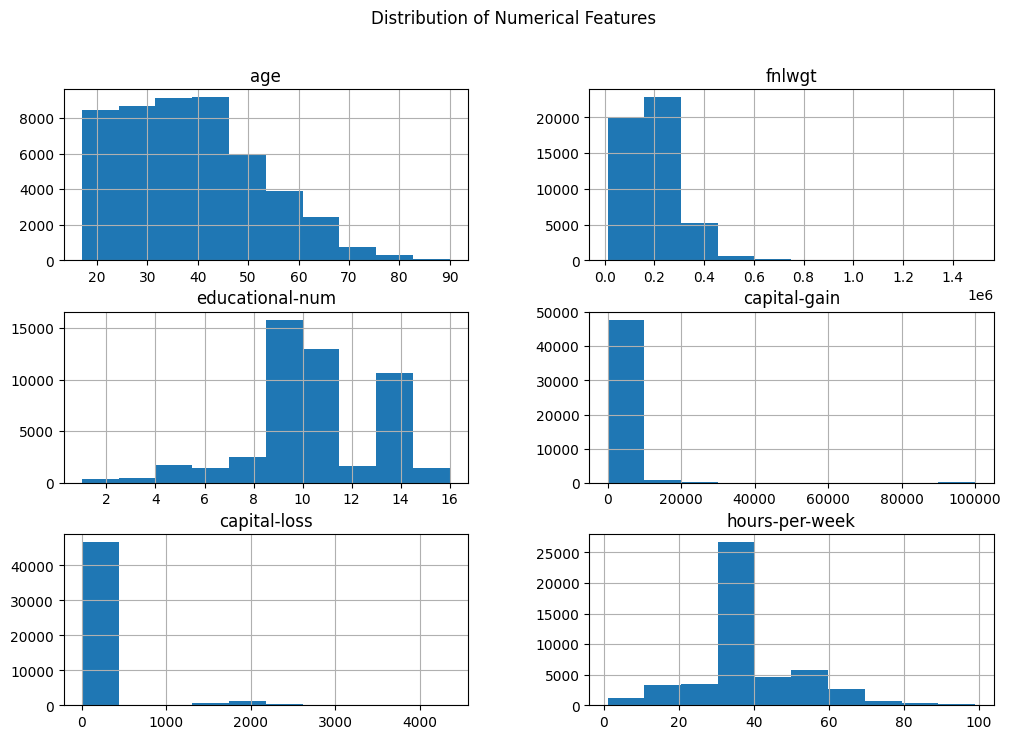

In [14]:
df[numerical_features].hist(figsize=(12,8))
plt.suptitle("Distribution of Numerical Features")
plt.show()

Categorical Features

- No categorical feature to analyze

Outlier detection (BOX PLOT)

In [15]:
# Detecting continuous numerical features
# Step 1: select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: keep only continuous features (exclude binary 0/1)
continuous_features = [
    col for col in numeric_cols
    if df[col].nunique() > 2
]

print("Continuous Numerical Features:", continuous_features)


Continuous Numerical Features: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


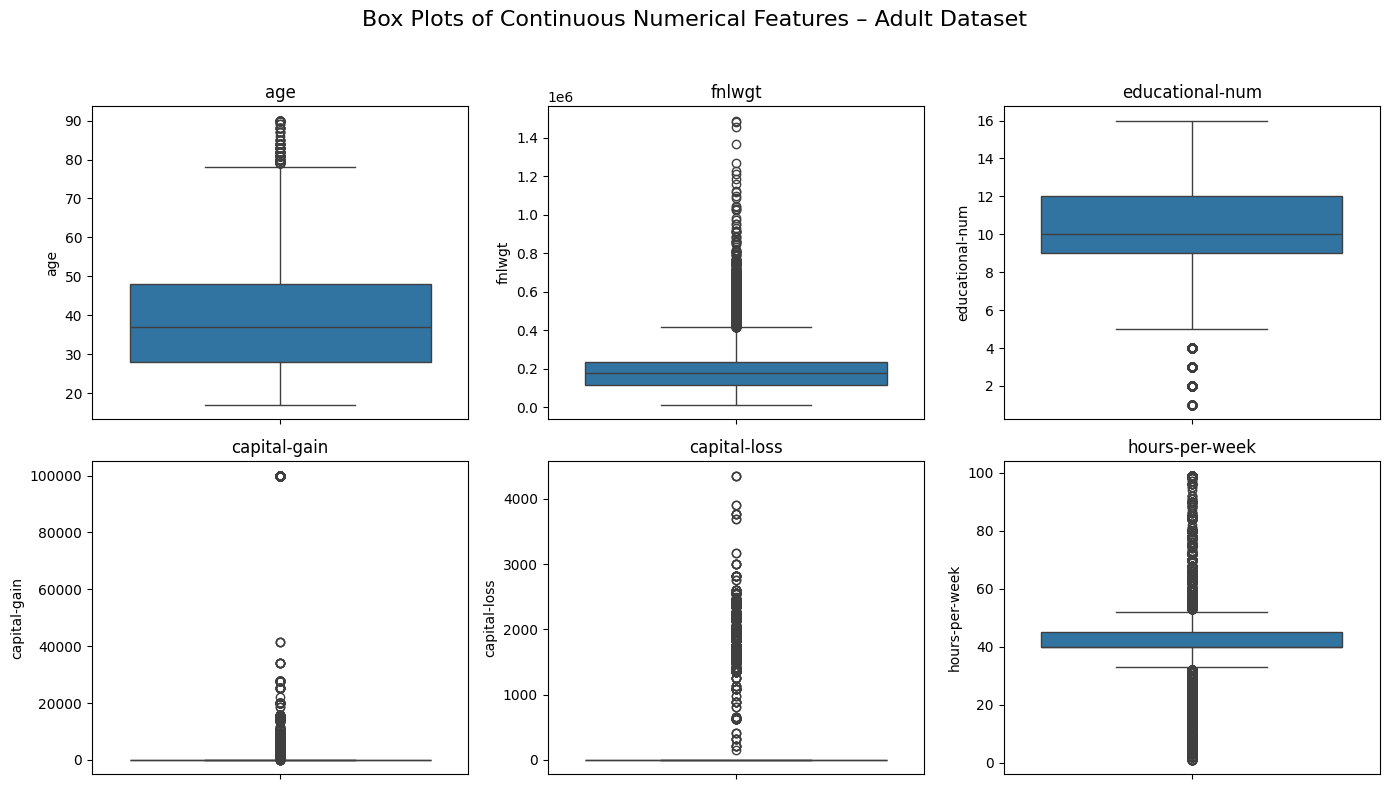

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

n_cols = 3
n_rows = math.ceil(len(continuous_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_features):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Box Plots of Continuous Numerical Features – Adult Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Correlation Heatmap

In [17]:
# Select numeric columns dynamically
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Optional: exclude binary or 0/1 columns if needed
numerical_features = [col for col in numerical_features if df[col].nunique() > 2]

print("Numeric Columns for Correlation:", numerical_features)

Numeric Columns for Correlation: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


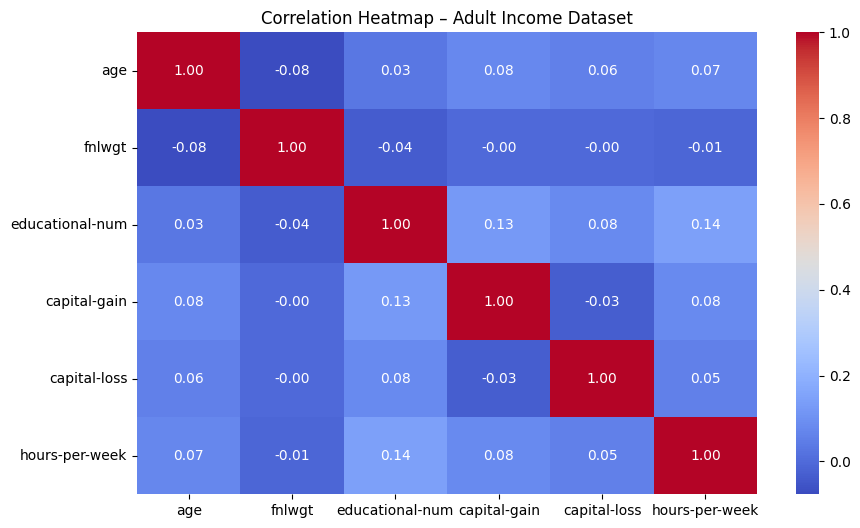

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap – Adult Income Dataset")
plt.show()


**Preprocessing**

In [19]:
#Apply Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

ordinal_features = ['education']  # ordered feature
for col in ordinal_features:
    df[col] = label_encoder.fit_transform(df[col])


In [20]:
#Apply One-Hot Encoding
nominal_features = [col for col in categorical_features if col not in ordinal_features]

df = pd.get_dummies(df, columns=nominal_features, drop_first=True)


In [21]:
#Scale Numerical Features Using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])


## Model Readiness Before and After Scaling

| Algorithm           | Before Scaling                     | After Scaling                           |
|--------------------|-----------------------------------|----------------------------------------|
| Linear Regression   | Slow convergence, unstable updates | Fast convergence, stable updates       |
| Logistic Regression | Slow convergence                  | Faster convergence                      |
| KNN                 | Distances distorted, poor accuracy | Distances normalized, better accuracy |
| SVM                 | Margin calculation affected        | Proper margin, improved performance    |
| K-Means             | Clusters biased by scale           | Balanced clustering                     |
| Decision Trees      | No significant effect              | No significant effect                   |
| Random Forest       | No significant effect              | No significant effect                   |


## Impact of Scaling on ML Algorithms

| Algorithm           | Scaling Required | Reason                                |
|--------------------|----------------|---------------------------------------|
| Linear Regression   | Yes            | Gradient descent sensitive to scale   |
| Logistic Regression | Yes            | Faster convergence                    |
| KNN                 | Yes            | Distance-based                        |
| SVM                 | Yes            | Margin calculation                     |
| K-Means             | Yes            | Euclidean distance                     |
| Decision Trees      | No             | Rule-based splits                      |
| Random Forest       | No             | Tree structure                         |


In [22]:
df.to_csv("adult_processed.csv.zip", index=False, compression='zip')